In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [4]:
df.shape

(50000, 2)

# This dataset is quite big let's analyze only first 10000 movies

In [5]:
df1=df.iloc[:10000]
df1.shape

(10000, 2)

In [6]:
df1.sample(3)   #random 3 records

,review,sentiment
3239,Writer/Director/Co-Star Adam Jones is headed f...,positive
7822,"This is a great film for pure entertainment, n...",positive
6052,"This is a fine, under-rated film and Rip Torn,...",positive


In [7]:
df1['sentiment'].value_counts()

sentiment
positive    5028
negative    4972
Name: count, dtype: int64

# Observation:
Our data is balanced dataset

In [8]:
df1.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df1.duplicated().sum()

17

In [10]:
df1.drop_duplicates(inplace=True)

/tmp/ipykernel_18/4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [11]:
df1.describe()

,review,sentiment
count,9983,9983
unique,9983,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,5023


<BarContainer object of 2 artists>

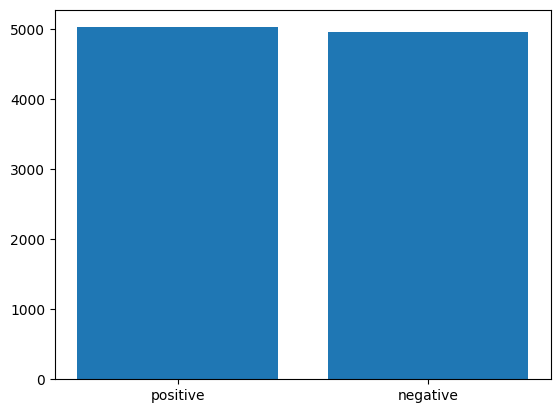

In [12]:
plt.bar(df1['sentiment'].value_counts().index, df1['sentiment'].value_counts())

# text preprocessing
1. lowercase the data
2. remove unnecessary symbols and tags
3. tokenization
4. apply stopwords
5. stemming

In [13]:
df1['review'][4]


'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

# Observation:
clearly text in review contains html tags and punctuation marks and other special characters, therefore we will remove these.

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#remove html tags and from the text, instead of this i will prefer code in the next cell to remove all the tags and unwanted symbols from the text
"""import re
def remove_tags(text):
    clear_text=re.sub(re.compile('<.*?>'),'',text)
    return clear_text
    """

"import re\ndef remove_tags(text):\n    clear_text=re.sub(re.compile('<.*?>'),'',text)\n    return clear_text\n    "

In [16]:
df1['review'] = df1['review'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))
#df1['review']=df1['review'].apply(lambda x: x.lower())
df1['review'][0]


'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Fo

In [17]:
df1['review']=df1['review'].apply(lambda x: x.lower())
df1['review'][0]    

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [18]:
#apply stopwords
import nltk
from nltk.corpus import stopwords


In [19]:
nltk.download('stopwords')
stop_words=stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#removing stopwords
df1['review']=df1['review'].apply(lambda x: [item for item in x.split() if item not in stop_words]).apply(lambda x: " ".join(x))
df1['review'][0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [21]:
#after applying all the text preprocessing, df1 is
df1.head(5)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [22]:
#Splitting X and y 
X=df1.iloc[:,0:1]
y=df1['sentiment']

In [23]:
X.head()

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...


In [24]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

In [25]:
#transformation of column y uding lable encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [27]:
print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)
print("y_train_shape",y_train.shape)
print("y_test_shape",y_test.shape)

X_train_shape (7487, 1)
X_test_shape (2496, 1)
y_train_shape (7487,)
y_test_shape (2496,)


In [28]:
#applying BOW for feature extraction
from sklearn.feature_extraction.text import CountVectorizer


In [29]:
cv=CountVectorizer()

In [30]:
X_train_bow=cv.fit_transform(X_train['review']).toarray()
X_test_bow=cv.transform(X_test['review']).toarray()

In [31]:
print(X_train_bow.shape)
print(X_test_bow.shape)


(7487, 64109)
(2496, 64109)


In [32]:
#Model building
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [33]:
y_pred=gnb.predict(X_test_bow)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.6354166666666666

# Observation: 
accuracy of our model is not very good. There can be many reasons for that.
1. we took a small dataset from the original one.
2. also there can be issue with the selected model.

In [34]:
print(confusion_matrix(y_test,y_pred))

[[890 354]
 [556 696]]


 from confusion matrix it is clear that there are many wrong predictions.

In [35]:
#prediction with randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred=rf.predict(X_test_bow)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8421474358974359
[[1031  213]
 [ 181 1071]]


Randomforest gives better accuracy than Naive bayes

# we can achieve better accuracy by 
1. selecting most frequent freatures from the vocanulary, and
2. by hyper paramter tuning

In [36]:
cv=CountVectorizer(max_features=4000)
X_train_bow=cv.fit_transform(X_train['review']).toarray()
X_test_bow=cv.transform(X_test['review']).toarray()
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_pred=rf.predict(X_test_bow)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8309294871794872
[[1031  213]
 [ 209 1043]]


# Observation: 
you can see accuracy decreased a bit but the number of features taken are also less than previous case.




In [37]:
#apply bi-gram, but take less number of features otherwise it will give memory error.
cv=CountVectorizer(ngram_range=(1,2), max_features=3000)
X_train_bow=cv.fit_transform(X_train['review']).toarray()
X_test_bow=cv.transform(X_test['review']).toarray()
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_pred=rf.predict(X_test_bow)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.828125
[[1045  199]
 [ 230 1022]]


No signuficant improvement. 

In [38]:
#Apply tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf=TfidfVectorizer()


In [40]:
X_train_tfidf=tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf=tfidf.transform(X_test['review']).toarray()


In [41]:
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_pred=rf.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.8385416666666666
[[1049  195]
 [ 208 1044]]


# Word2Vec
1. apply word2vec
2. word2vec for single word
3. avgword2vec for whole document or sentence.


In [42]:
df2=df.iloc[10000:20000]

In [43]:
print(df1.duplicated().sum())

0


In [44]:
#Text Preprocessing
df2['review'] = df2['review'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))
df2['review']=df2['review'].apply(lambda x: x.lower())
df2['review'][10001]


'a french novelist disgusted by his wifes society friends goes to north africa for a respite there he encounters a vivacious  talented bedouin girl living in poverty to spite his wife who is romancing a maharajah he decides to train  educate the girl and present her to parisian society as the princesse tam tambr br the marvelous josephine baker is perfectly cast in the title role in this very enjoyable french film with her enormous eyes  infectious smile she makes contact with the viewers heartstrings immediately her oversized personality  obvious joy of performing make her a pure pleasure to watch baker makes us care about whats happening to poor alwina during her transformation  introduction to european moresbr br albert préjean does very well as the pygmalion to bakers galatea also effective are georges peclet as a halfcaste servant and jean galland as the mysterious maharajahbr br the film is very handsome  well made looking a little reminiscent of busby berkeley movies being produ

In [45]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [46]:
data=[]
for doc in df2['review']:
    sent_token=sent_tokenize(doc)
    for sent in sent_token:
        data.append(simple_preprocess(sent))

In [47]:
model=gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [48]:
model.build_vocab(data)

In [49]:
model.train(data, total_examples=model.corpus_count,epochs=model.epochs)

(8260406, 10962345)

In [50]:
len(model.wv.index_to_key)

36057

In [51]:
#avegword2vec
def document_vector(doc):
    #first remove out_of_vocabulary words
    doc=[word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc],axis=0)

In [52]:
document_vector(df2['review'].values[0])

array([ 0.43933243,  0.17665994,  0.04081652, -0.57920283,  0.24821672,
       -0.15694048, -0.13466161,  0.6317492 , -0.38490024, -0.14245252,
       -0.3319692 , -0.28077173,  0.02636208,  0.17998138,  0.7608199 ,
        0.08413982, -0.23202313, -0.23272108,  0.13105659, -0.5318668 ,
        0.10812921,  0.3753072 ,  0.39017522, -0.39102927, -0.45010167,
        0.38533813, -0.61827564, -0.4705431 , -0.46126577,  0.08835135,
        0.4980762 , -0.01278793,  0.65967554, -0.45739412, -0.6255439 ,
        0.3078794 ,  0.03826225, -0.01006192, -0.7497128 , -0.02680314,
       -0.08801977,  0.35150555,  0.1021999 ,  0.15440792,  0.30123404,
        0.44331145,  0.21459165, -0.6495168 ,  0.52305067, -0.29355887,
       -0.4043537 , -0.40971363,  0.41885814, -0.15331268,  0.04622978,
       -0.48879603, -0.37168476, -0.20711684, -0.0502872 ,  0.0171526 ,
       -0.05450995,  0.10225044, -0.33405352,  0.15767008, -0.19943446,
        0.6982913 ,  0.1119386 , -0.04608605, -0.42683685, -0.19

In [53]:
from tqdm import tqdm

In [54]:
X=[]
for doc in tqdm(df2['review'].values):
    X.append(document_vector(doc))

100%|██████████| 10000/10000 [05:00<00:00, 33.23it/s]


In [55]:
X=np.array(X)

In [56]:
X.shape

(10000, 100)

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

y=encoder.fit_transform(df2['sentiment'])

In [58]:
y

array([0, 1, 0, ..., 1, 1, 0])

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7396
[[958 335]
 [316 891]]


# Observation:
didn't get good accuracy, reasons can be 
1. less amount of data taken for model training
2. we trained our model from scretch instead of using pretrained model.